# Bike Sharing Casestudy


Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [98]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## Reading And Understanding The data

Importing the data into a Dataframe

In [3]:
bike = pd.read_csv('day.csv')

In [4]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.shape

(730, 16)

In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Checking the columns in the dataframe
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

###### We see that:
- there are about 730 rows and 16 columns
- the 'dteday' has an object dtype
- the columns that have int/ float dtype can be categorical

## Data Cleaning

Check for Missing Data

In [9]:
(bike.isnull().mean()/100).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [10]:
(bike.isnull().mean(axis=1)/100).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

There seems to be no missing data. Now, we check on the columns that might not hold much value at the time of prediction. 

In [11]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Column 'instant' is just an index and does not necessarily contribute to the analysis. It makes sense to drop it.

In [12]:
#dropping 'instance' from dataframe
bike.drop(['instant'], axis = 1, inplace = True)

Column 'dteday' is available in diiferent columns of 'yr' and 'mnth'. Hence this can also be dropped. 

In [13]:
bike.drop(['dteday'], axis = 1, inplace = True)

Columns 'casual' and 'registered' are added up in the column 'cnt'. The check on the sum can be done as below. 

In [14]:
bike.head()['casual']+bike.head()['registered']

0     985
1     801
2    1349
3    1562
4    1600
dtype: int64

Since the value of the addition is equal to 'cnt', we can remove casual and registered. 

In [15]:
bike.drop(['casual'], axis = 1, inplace = True)
bike.drop(['registered'], axis = 1, inplace = True)

In [16]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Checking For Outliers

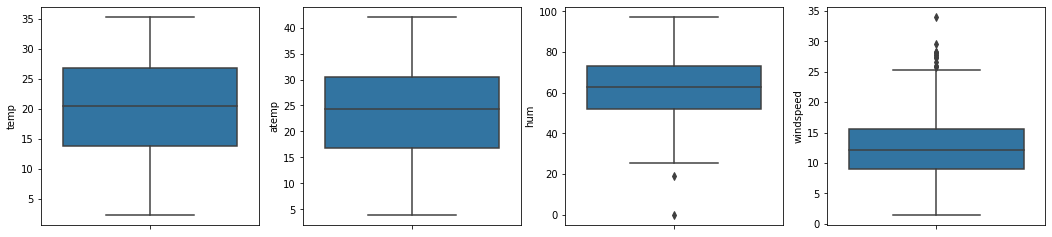

In [17]:
col = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))
i = 1
for c in col:
    plt.subplot(1,4,i)
    sns.boxplot(y=c, data=bike)
    i+=1

We can conclude that the outliers are managable and hence we are good to start with visualizations.

### Categorizing data

Finding the different values and number of times that has appeared in the dgataset. This helps us in categorising the variables.

In [18]:
bike.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [19]:
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [20]:
bike.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [21]:
bike.weekday.value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [22]:
bike.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [23]:
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

The above variables are to be categorized into the following:

- season= 1:spring, 2:summer, 3:fall, 4:winter
- mnth= 1: Jan, 2: Feb, 3: Mar, 4: Apr, 5: May, 6: Jun, 7: Jul, 8: Aug, 9: Sep, 10:Oct, 11:Nov, 12:Dec
- weekday= 0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'


## Exploratory Data Analysis

#### Analysis and Visualization of Continuous Variables

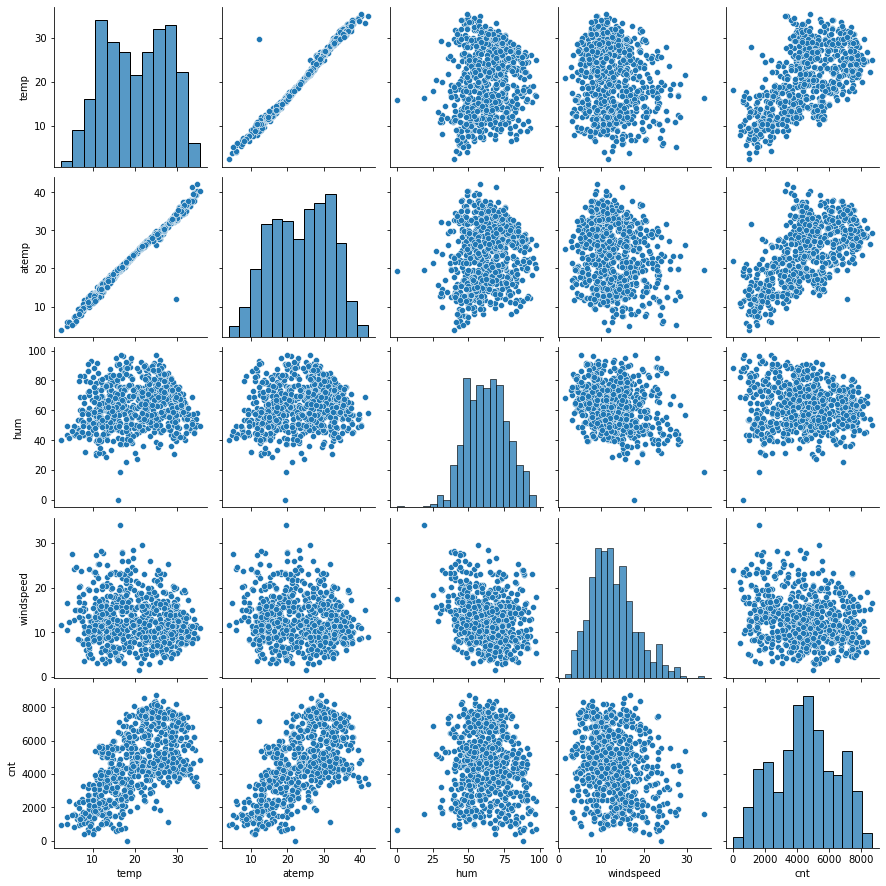

In [24]:
bike_cont = bike[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bike_cont)
plt.show()

- It is seen that there is a Linear Relationship between 'cnt' and 'temp' and 'atemp'.
- It seems that there is less of a Linear Relatioship between 'hum' and 'windspeed' with respect to 'cnt'.
- Features 'temp' and 'atemp' are highly co-related to each other

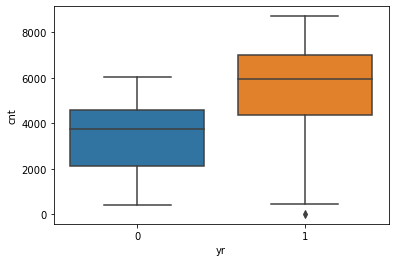

In [25]:
sns.boxplot(data=bike, x='yr', y='cnt')
plt.show()

There is an increase in the demand for bikes from 2018 to 2019. Now, it makes sense to analyze how the predictor variables are affecting the demand and bookings of bike.

#### Analysis of  and Visualization of Categorical Variables against the target variable 'cnt'.

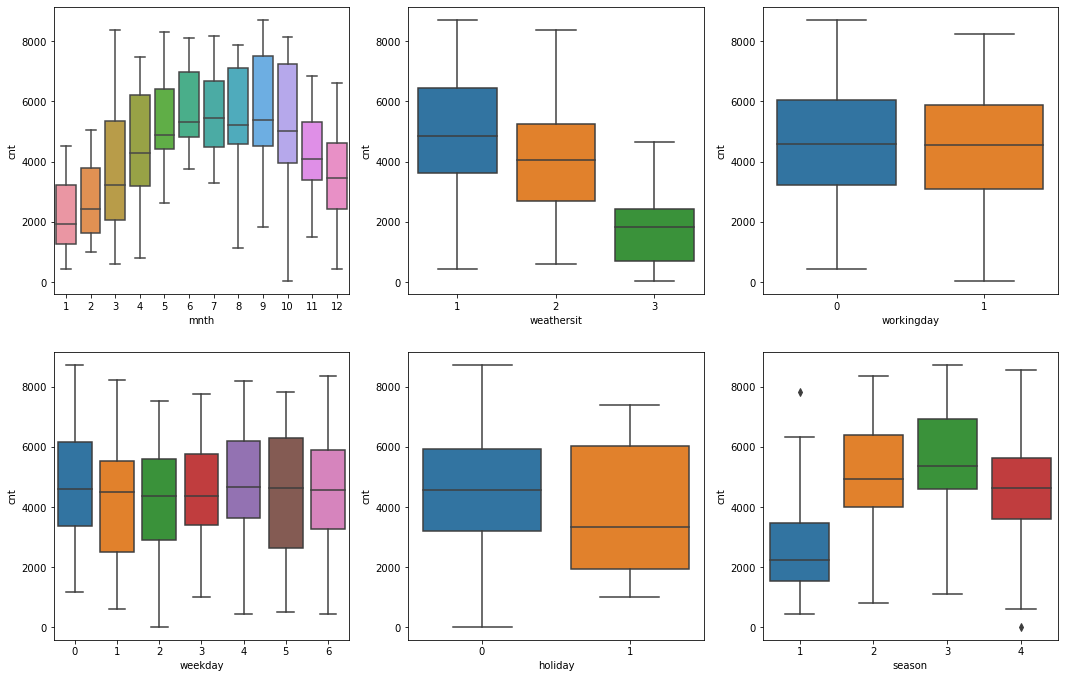

In [26]:
plt.figure(figsize=(18,18))
vars=['mnth','weathersit','workingday','weekday','holiday','season']
for i in enumerate(vars):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike, x=i[1], y='cnt')
plt.show()

The following inferences can be derived from the above plot:
- 'mnth' shows that month of September had increased number of bike bookings followed by July, June and August.
- The days that have a clear weather seem to have more number of bookings followed by days that are cloudy and then the days with light rain.
- There is a small increase in demand during the weekend.
- There is a close trend in the weekday variable. This might not be a good predictor variable.
- The plot shows that the days that are not holidays tend to have more bookings than the days that are holidays.
- 'fall' seems to get more bookings than other seasons followed by summer, winter and spring

#### Correlation Matrix

Analyzing the correlation between variables.

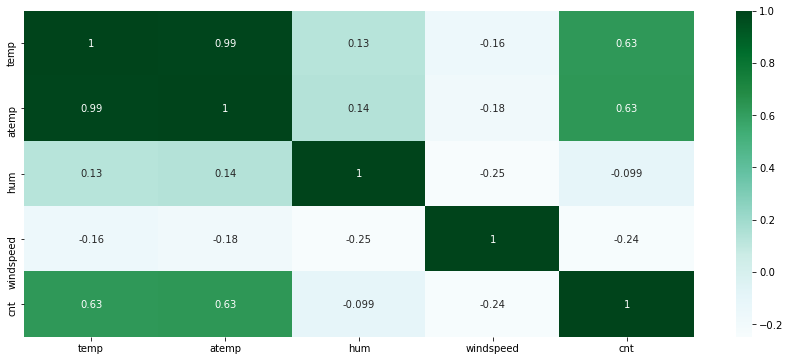

In [27]:
# Checking relationship between variables
plt.figure(figsize=(15,6))
sns.heatmap(bike[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

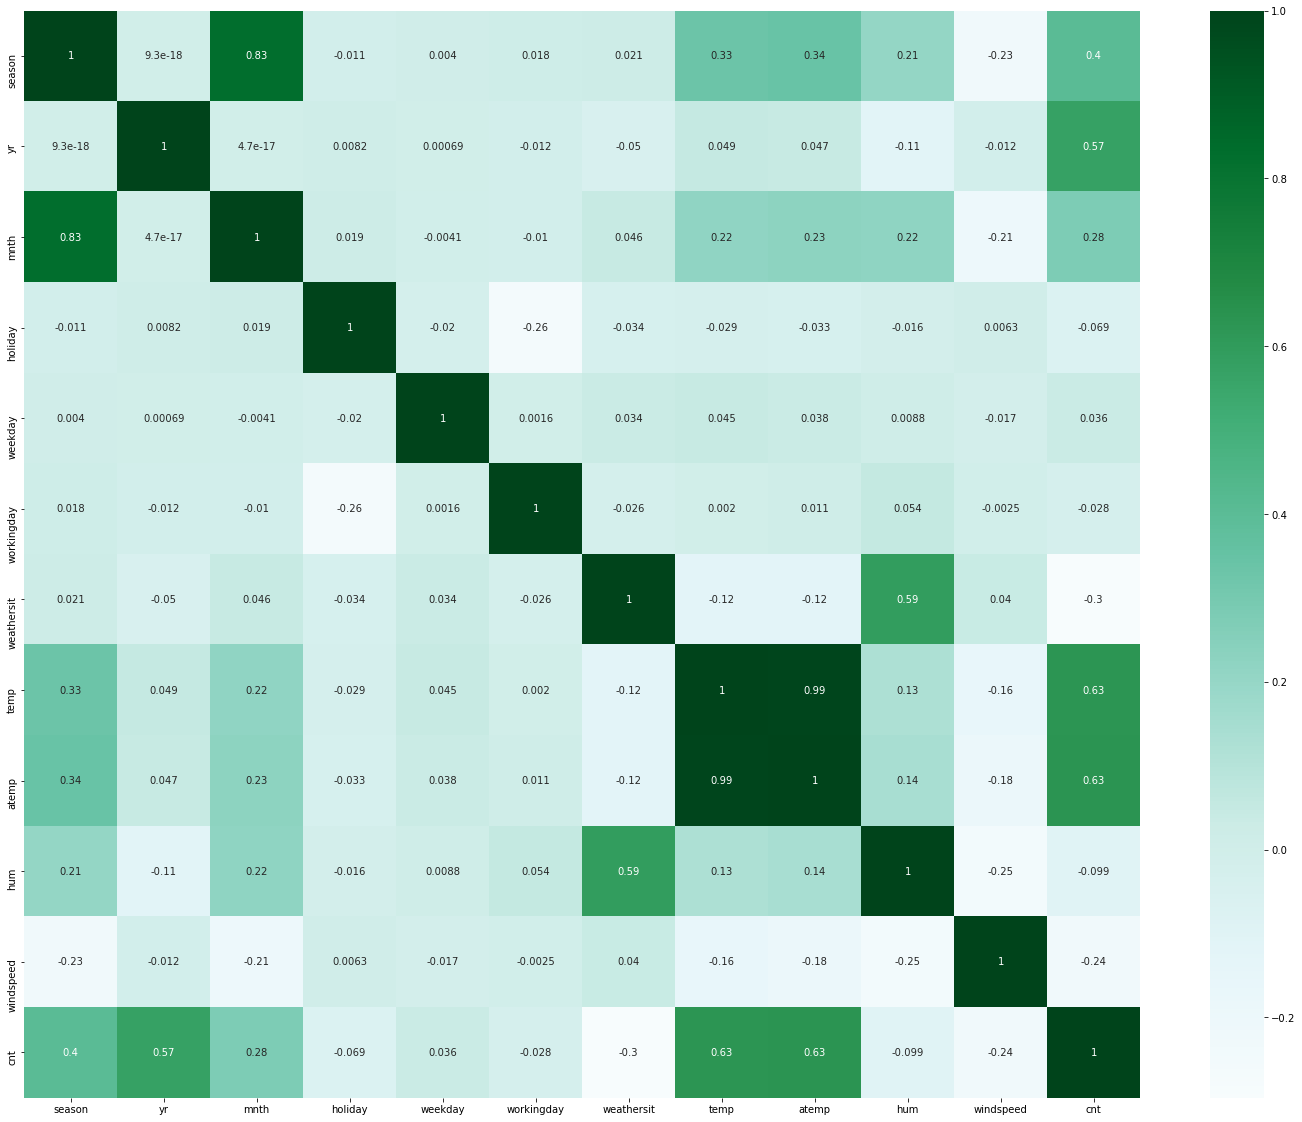

In [28]:
plt.figure(figsize = (25,20))
sns.heatmap(bike.corr(), annot = True, cmap="BuGn")
plt.show()

- The above plot proves the high corelation between 'temp' and 'atemp'
- With 'cnt', we can see that the 'temp' and 'atemp' 

## Creating Dummy Variables

Dummy variables can be created for the categorical variables such as 'mnth', 'weekday', 'season' and 'weathersit'. Since these are categorical, it makes sense to change their datatype to category.

In [29]:
bike['season']=bike['season'].astype('category')
bike['weathersit']=bike['weathersit'].astype('category')
bike['mnth']=bike['mnth'].astype('category')
bike['weekday']=bike['weekday'].astype('category')

In [30]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [31]:
# Creating dummy varibles
bike = pd.get_dummies(bike, drop_first=True)

In [32]:
bike.shape

(730, 30)

In [33]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

## Splitting the Data into train/ test sets

In [34]:
bike_train, bike_test = train_test_split(bike, train_size = 0.70, random_state = 100)

In [35]:
bike_train.shape

(510, 30)

In [36]:
bike_test.shape

(220, 30)

In [37]:
bike_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

##### Checking for correlation between the variables in train dataset.

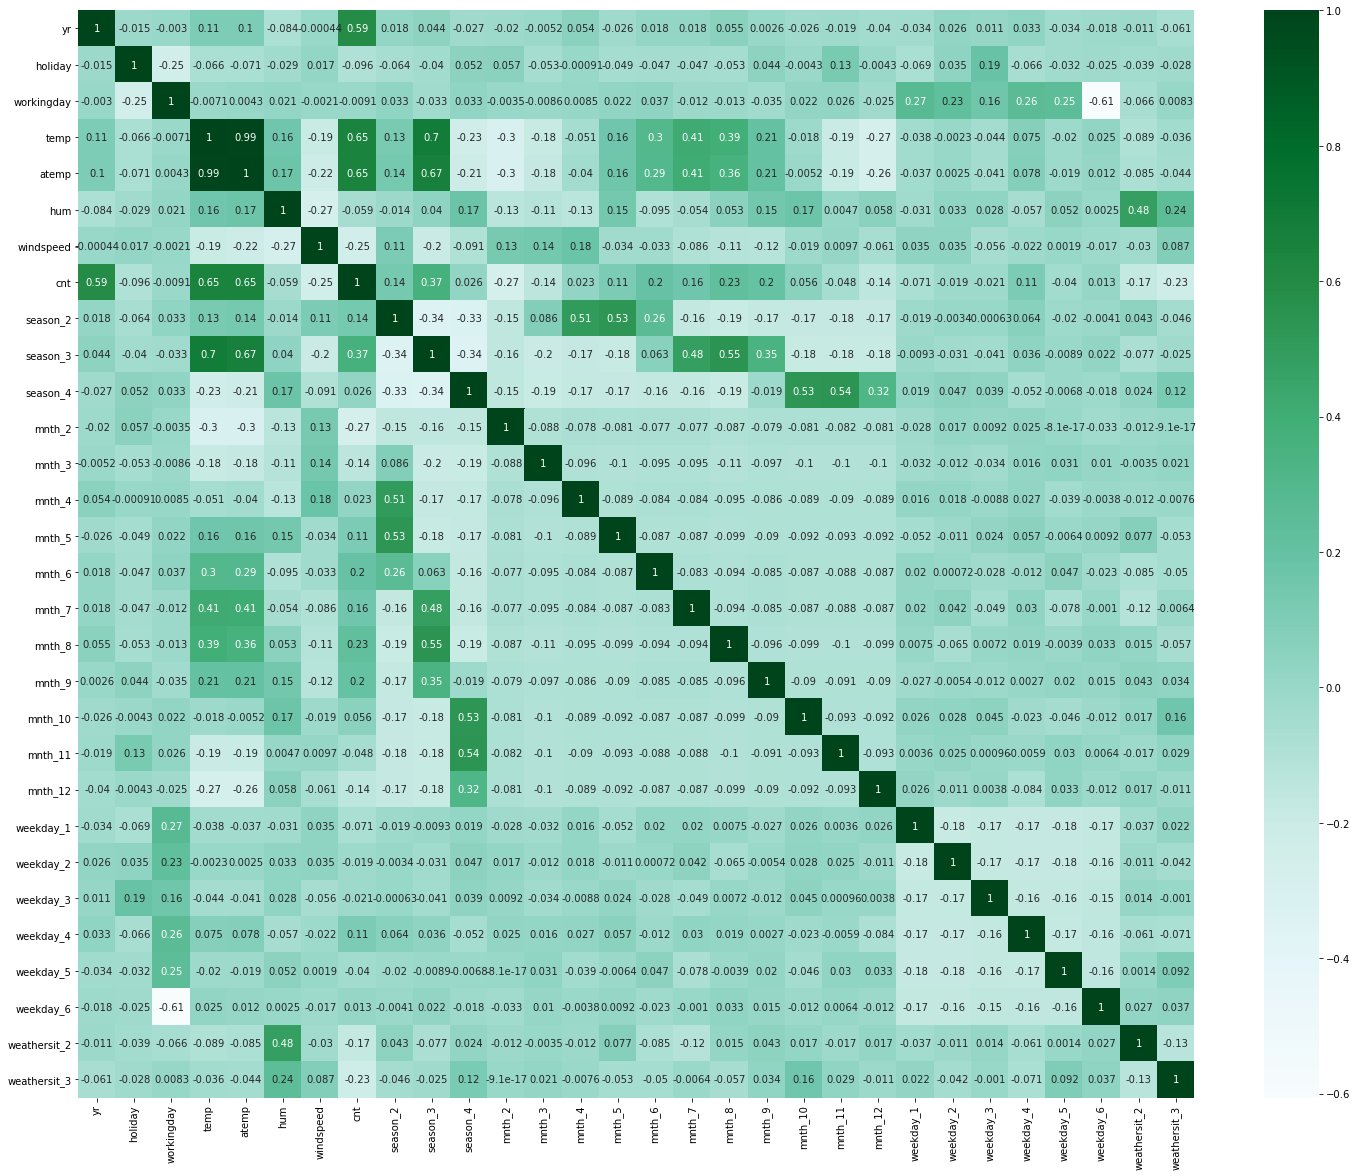

In [38]:
plt.figure(figsize = (25,20))
sns.heatmap(bike_train.corr(), annot = True, cmap="BuGn")
plt.show()

We can see that there are multicollinear variables and variables that have high collinearity with target variable. This plot can help us with VIf and p-value for model selection.

## Feature Rescaling

In [39]:
scaler= MinMaxScaler()

In [40]:
# scaling the numerical variables
var = ['temp','atemp','hum','windspeed','cnt']

bike_train[var] = scaler.fit_transform(bike_train[var])
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,0,0,1,0


## Model Building


#### Model - 1

In [41]:
#Assigning target variable to y_train
y_train = bike_train.pop('cnt')

In [42]:
# Setting feature variables to X_train
X_train = bike_train

In [43]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

### Iterative modelling

- We see that there are around 30 different variables and all these 30 variables might not be useful in training an effective model. Hence, we select a few (say half of the number of variables, i.e., 15) variables using 'Recursive Feature Elimination (RFE)' from sklearn. RFE helps us by ranking the varibles in order of importance.

In [44]:
rfe = RFE(lr, 15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [45]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', True, 1),
 ('mnth_4', False, 3),
 ('mnth_5', True, 1),
 ('mnth_6', False, 2),
 ('mnth_7', False, 12),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_1', False, 9),
 ('weekday_2', False, 10),
 ('weekday_3', False, 8),
 ('weekday_4', False, 6),
 ('weekday_5', False, 7),
 ('weekday_6', False, 15),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

Now, we start building the models.

In [46]:
# Function defiinition for model building
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [47]:
# Function definition for VIF
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [48]:
cols = X_train.columns[rfe.support_]

In [49]:
# Model building using rfe supported cols
lr1 = build_model(cols)
lr1

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.00e-188
Time:                        13:15:38   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2374      0.027      8.665   

In [50]:
get_vif(cols)

        Features    VIF
2           temp  24.63
3            hum  15.53
6       season_3   8.80
4      windspeed   3.81
5       season_2   3.75
7       season_4   3.11
13  weathersit_2   2.15
0             yr   2.05
10        mnth_8   1.85
9         mnth_5   1.68
12       mnth_10   1.63
11        mnth_9   1.51
8         mnth_3   1.32
14  weathersit_3   1.19
1        holiday   1.05


In [51]:
lr1.params

const           0.237384
yr              0.230442
holiday        -0.088900
temp            0.486920
hum            -0.179606
windspeed      -0.183865
season_2        0.116592
season_3        0.042479
season_4        0.152975
mnth_3          0.032292
mnth_5          0.028201
mnth_8          0.050905
mnth_9          0.120667
mnth_10         0.040741
weathersit_2   -0.054170
weathersit_3   -0.242870
dtype: float64

The p-value for 'mnth_5' is 0.115, which is higher than the mark of 0.05, making its coefficient insignificant. Hence, we can drop the column and then try building a new model.

In [52]:
cols = cols.drop('mnth_5')

In [53]:
lr2 = build_model(cols)
lr2

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Tue, 10 May 2022   Prob (F-statistic):          2.46e-189
Time:                        13:15:39   Log-Likelihood:                 512.68
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     495   BIC:                            -931.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2322      0.027      8.525   

In [54]:
get_vif(cols)

        Features    VIF
2           temp  24.02
3            hum  15.48
6       season_3   8.53
4      windspeed   3.73
5       season_2   3.53
7       season_4   3.05
12  weathersit_2   2.15
0             yr   2.03
9         mnth_8   1.85
11       mnth_10   1.63
10        mnth_9   1.51
8         mnth_3   1.27
13  weathersit_3   1.19
1        holiday   1.05


In [55]:
lr2.params

const           0.232239
yr              0.229774
holiday        -0.090038
temp            0.496526
hum            -0.171899
windspeed      -0.185786
season_2        0.122505
season_3        0.036114
season_4        0.150156
mnth_3          0.027934
mnth_8          0.050457
mnth_9          0.120186
mnth_10         0.039287
weathersit_2   -0.054371
weathersit_3   -0.244911
dtype: float64

Column 'season_3' also has a higher p-value along with higher VIF, this can be dropped.

In [56]:
cols = cols.drop('season_3')

In [57]:
lr3 = build_model(cols)
lr3

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.2
Date:                Tue, 10 May 2022   Prob (F-statistic):          5.94e-190
Time:                        13:15:39   Log-Likelihood:                 511.38
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     496   BIC:                            -935.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2326      0.027      8.525   

In [58]:
get_vif(cols)

        Features    VIF
3            hum  14.73
2           temp  10.01
4      windspeed   3.70
6       season_4   2.32
11  weathersit_2   2.14
0             yr   2.02
5       season_2   1.84
8         mnth_8   1.61
10       mnth_10   1.60
9         mnth_9   1.34
7         mnth_3   1.22
12  weathersit_3   1.18
1        holiday   1.04


In [59]:
lr3.params

const           0.232586
yr              0.228689
holiday        -0.091705
temp            0.537143
hum            -0.180550
windspeed      -0.189317
season_2        0.105884
season_4        0.139280
mnth_3          0.023293
mnth_8          0.060488
mnth_9          0.129246
mnth_10         0.035508
weathersit_2   -0.053215
weathersit_3   -0.240076
dtype: float64

Column 'mnth_3' also has higher p_value and can be dropped.

In [60]:
cols = cols.drop('mnth_3')

In [61]:
lr4 = build_model(cols)
lr4

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.49e-190
Time:                        13:15:40   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     497   BIC:                            -938.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2390      0.027      8.838   

In [62]:
get_vif(cols)

        Features    VIF
3            hum  14.38
2           temp   9.88
4      windspeed   3.59
6       season_4   2.25
10  weathersit_2   2.13
0             yr   2.02
5       season_2   1.84
7         mnth_8   1.60
9        mnth_10   1.60
8         mnth_9   1.34
11  weathersit_3   1.18
1        holiday   1.04


In [63]:
lr4.params

const           0.239027
yr              0.228857
holiday        -0.094111
temp            0.531625
hum            -0.181797
windspeed      -0.186835
season_2        0.105803
season_4        0.135308
mnth_8          0.058540
mnth_9          0.127705
mnth_10         0.035821
weathersit_2   -0.053105
weathersit_3   -0.238470
dtype: float64

Column 'mnth_10' also has higher p_value and can be dropped. 

In [64]:
cols= cols.drop('mnth_10')

In [65]:
lr5 = build_model(cols)
lr5

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     239.5
Date:                Tue, 10 May 2022   Prob (F-statistic):          7.50e-191
Time:                        13:15:40   Log-Likelihood:                 507.86
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     498   BIC:                            -940.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2322      0.027      8.623   

In [66]:
get_vif(cols)

        Features    VIF
3            hum  14.31
2           temp   9.66
4      windspeed   3.59
9   weathersit_2   2.13
0             yr   2.01
5       season_2   1.83
6       season_4   1.75
7         mnth_8   1.59
8         mnth_9   1.31
10  weathersit_3   1.16
1        holiday   1.04


In [67]:
lr5.params

const           0.232159
yr              0.228562
holiday        -0.095283
temp            0.539673
hum            -0.177567
windspeed      -0.183763
season_2        0.104107
season_4        0.147144
mnth_8          0.055340
mnth_9          0.122401
weathersit_2   -0.052829
weathersit_3   -0.233754
dtype: float64

Column 'hum' has a higher VIF and we can try dropping this to get a better model

In [68]:
cols = cols.drop('hum')

In [69]:
lr6 = build_model(cols)
lr6

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Tue, 10 May 2022   Prob (F-statistic):          2.62e-187
Time:                        13:15:41   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1307      0.017      7.837   

In [70]:
get_vif(cols)

       Features   VIF
2          temp  5.01
3     windspeed  3.10
0            yr  2.00
4      season_2  1.82
6        mnth_8  1.58
8  weathersit_2  1.49
5      season_4  1.48
7        mnth_9  1.31
9  weathersit_3  1.08
1       holiday  1.04


In [71]:
lr6.params

const           0.130722
yr              0.232563
holiday        -0.096575
temp            0.517336
windspeed      -0.149709
season_2        0.101217
season_4        0.137090
mnth_8          0.054141
mnth_9          0.116291
weathersit_2   -0.081139
weathersit_3   -0.281852
dtype: float64

#### Inference:

- All above parameters seems to hold significance in the process of building an effective model and shows lower multicollinearity and the p-values are also low. The VIF of feature 'temp' is above 5, but the feature seems to be significant in model building and dropping the column might not give desired result. We can continue with lr6. R_squared and adjuted r_aquared values also seem good.

### Testing the compliance of the model with respect to Assumptions of Linear Regression.

Null hypothesis says that the coefficients (B1,B2,....,Bn) are equal to zero. Alternate hypothesis says that the coefficients are not equal to zero.

From the recent model lr6, we can say that the coefficients have a value that is not zero. Hence, we can reject the Null Hypothesis.

Thus, the best fitted equation according to model lr6 is 

cnt = 0.130722 + (yr × 0.232563) - (holiday × 0.096575) + (temp × 0.517336) − (windspeed × 0.149709) + (season_2 × 0.101217) + (season_4 × 0.137090) + (mnth_8 × 0.054141) +(mnth_9 x 0.116291) − (weathersit_light ×0.281852) − (weathersit_mist × 0.081139)

In [72]:
lr_auto = LinearRegression()
lr_auto.fit(X_train[cols],y_train)

LinearRegression()

## Residual Analysis

In [73]:
y_train_pred = lr_auto.predict(X_train[cols])

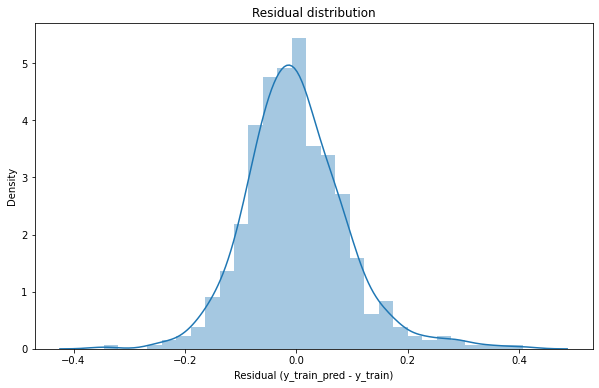

In [74]:
residual = y_train_pred - y_train
plt.figure(figsize=(10,6))
sns.distplot(residual)
plt.title('Residual distribution')
plt.xlabel('Residual (y_train_pred - y_train)')
plt.show()

#### Inference: 
From the above graph it is evident that Residual values are normallly distributed, which indicates that our model has handled the assumption of Error Normal Distribution properly.

#####  Homoscedasticity

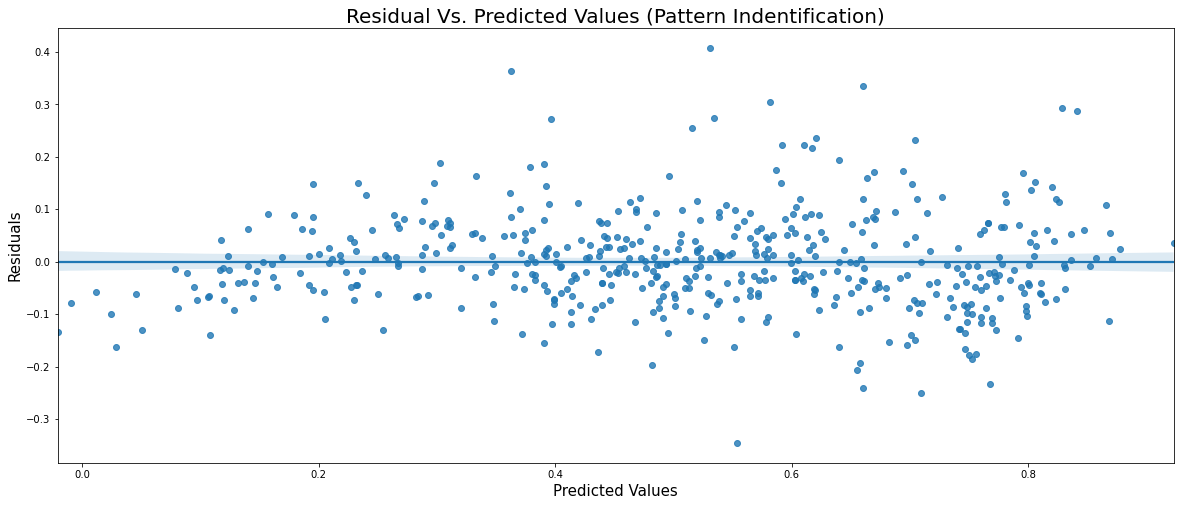

In [75]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.regplot(x=y_train_pred, y=residual,ax=ax)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()


##### Independence of residuals

In [76]:
print("Pearson Value for Predicted Value Against Residual ==>", pearsonr(y_train_pred, residual)[0])
print('The Durbin-Watson value for Final Model lr6 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),2))

Pearson Value for Predicted Value Against Residual ==> 1.0894063429134349e-15
The Durbin-Watson value for Final Model lr6 is 2.06


This shows that there is no specific pattern.

##### Linearity

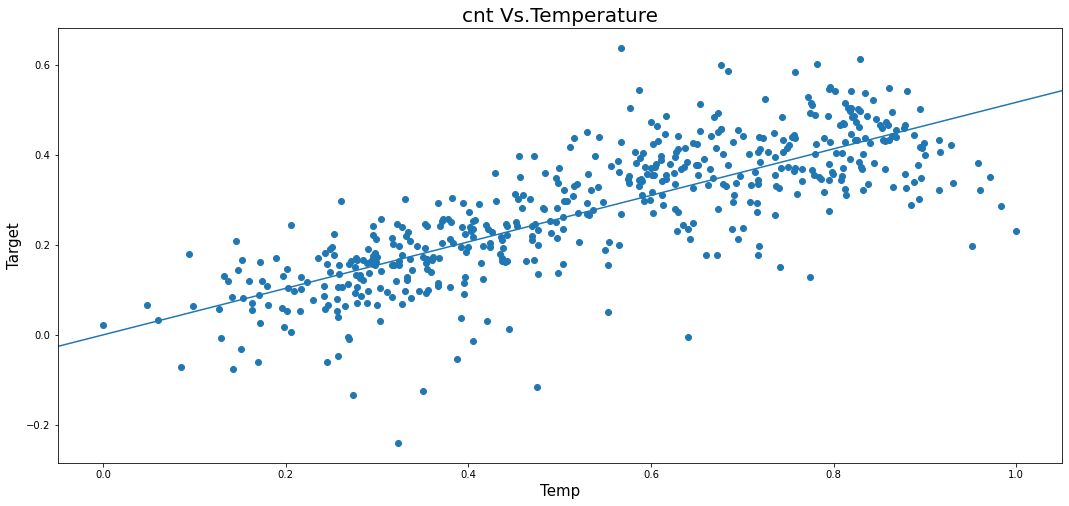

In [77]:
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sm.graphics.plot_ccpr(lr6, 'temp',ax=ax)
plt.title('cnt Vs.Temperature', fontdict={'fontsize': 20})
plt.xlabel('Temp', fontdict={'fontsize': 15})
plt.ylabel('Target', fontdict={'fontsize': 15})
plt.show()

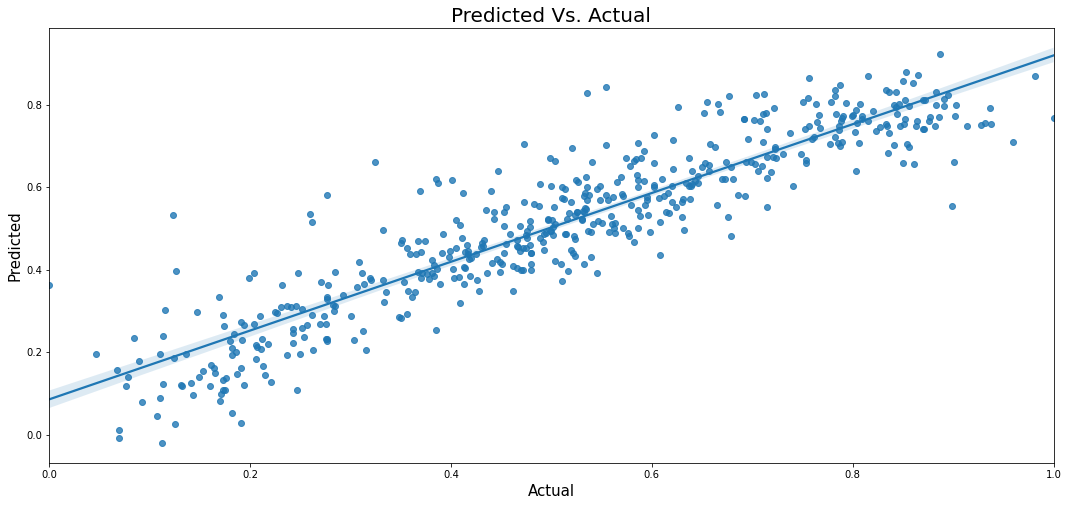

In [78]:
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.regplot(x=y_train, y=y_train_pred, ax=ax)
plt.title('Predicted Vs. Actual', fontdict={'fontsize': 20})
plt.xlabel('Actual', fontdict={'fontsize': 15})
plt.ylabel('Predicted', fontdict={'fontsize': 15})
plt.show()

Here we see equal distribution of data points and we can also verify that there is no specific pattern followed.

##### Multicollinearity

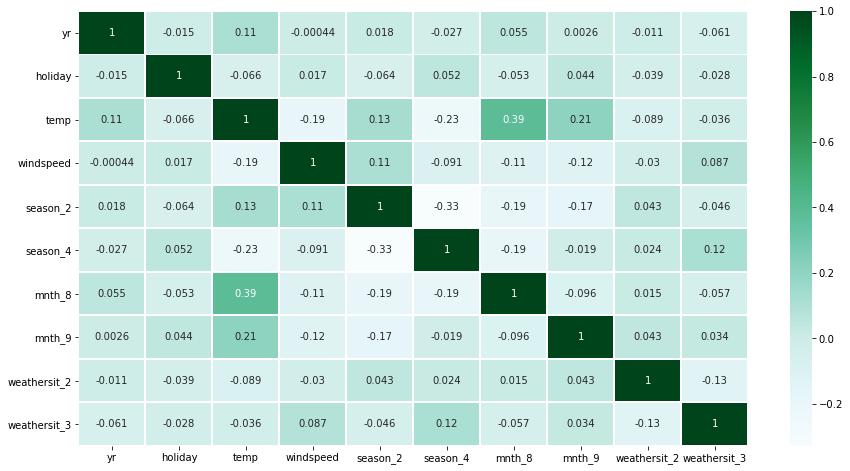

In [79]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train[cols].corr(),annot = True, cmap="BuGn",linewidth =1)
plt.show()

This proves the absence of multicollinearity as all the variables are independent of each other.

##### R-squared of train data

In [80]:
r2_score(y_train, y_train_pred)

0.8338606244120907

## Model Evaluation

We use the obtain model for prediction on test data. Before that we have to make sure the test and train data are of similar pattern

In [81]:
var = ['temp','atemp','hum','windspeed','cnt']

bike_test[var] = scaler.transform(bike_test[var])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,0,0,1,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,0,1,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,0,0,1,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,0,0,1,0,0


In [82]:
#Assigning target variable to y_test
y_test = bike_test.pop('cnt')

In [83]:
# Setting feature variables to X_test
X_test = bike_test

In [84]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            220 non-null    int64  
 1   holiday       220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   atemp         220 non-null    float64
 5   hum           220 non-null    float64
 6   windspeed     220 non-null    float64
 7   season_2      220 non-null    uint8  
 8   season_3      220 non-null    uint8  
 9   season_4      220 non-null    uint8  
 10  mnth_2        220 non-null    uint8  
 11  mnth_3        220 non-null    uint8  
 12  mnth_4        220 non-null    uint8  
 13  mnth_5        220 non-null    uint8  
 14  mnth_6        220 non-null    uint8  
 15  mnth_7        220 non-null    uint8  
 16  mnth_8        220 non-null    uint8  
 17  mnth_9        220 non-null    uint8  
 18  mnth_10       220 non-null  

In [85]:
X_test_pred = X_test[cols]
X_test_pred = sm.add_constant(X_test_pred)

In [86]:
X_test_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         220 non-null    float64
 1   yr            220 non-null    int64  
 2   holiday       220 non-null    int64  
 3   temp          220 non-null    float64
 4   windspeed     220 non-null    float64
 5   season_2      220 non-null    uint8  
 6   season_4      220 non-null    uint8  
 7   mnth_8        220 non-null    uint8  
 8   mnth_9        220 non-null    uint8  
 9   weathersit_2  220 non-null    uint8  
 10  weathersit_3  220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.6 KB


#### Prediction on test dataset

In [87]:
y_pred = lr6.predict(X_test_pred)

In [88]:
y_pred.head(10)

184    0.370711
535    0.907790
299    0.401497
221    0.590123
152    0.574274
404    0.447160
198    0.518086
171    0.408920
512    0.739472
200    0.564877
dtype: float64

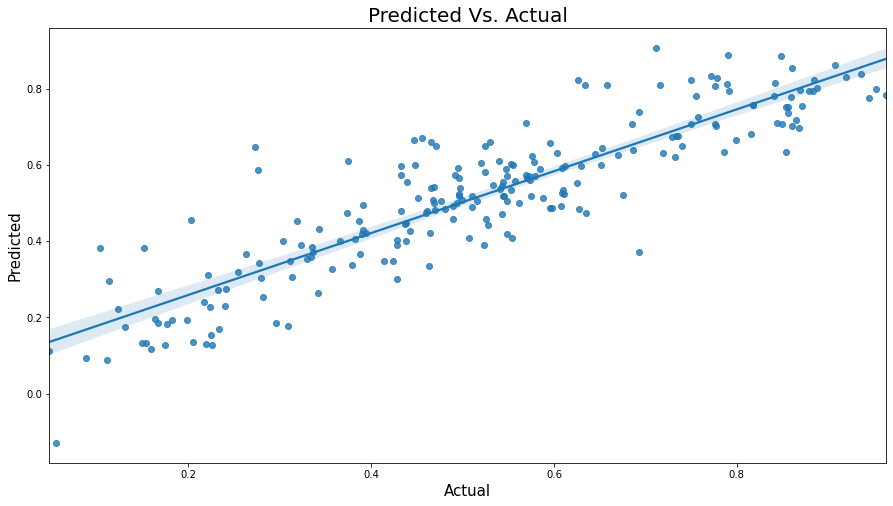

In [89]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
corr_plot = sns.regplot(x=y_test, y=y_pred,ax=ax)
plt.title('Predicted Vs. Actual', fontdict={'fontsize': 20})
plt.xlabel('Actual', fontdict={'fontsize': 15})
plt.ylabel('Predicted', fontdict={'fontsize': 15})
plt.show()

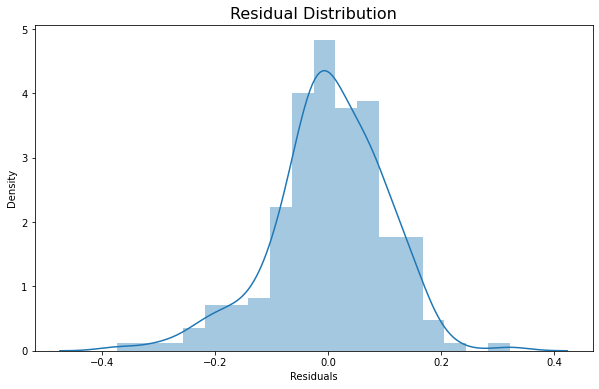

In [94]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
residual_test = y_test - y_pred
plt.title('Residual Distribution', fontsize=16) 
plt.xlabel('Residuals')
sns.distplot(residual_test)
plt.show()

##### R-squared for test

In [93]:
r2_score = r2_score(y_test, y_pred)
r2_score

0.7935224695104378

##### Adjusted R-squared for test

In [96]:
n=X_test_pred.shape[0]
p=X_test_pred.shape[1]
adjusted_r2 = 1-(1-r2_score)*(n-1)/(n-p-1)
adjusted_r2

0.7826029847249321

##### Mean Squared Error

In [99]:
mse = mean_squared_error(y_test, y_pred)
print('Mean_Squared_Error :' ,round(mse,4))

Mean_Squared_Error : 0.0099


## Conclusion

- R-squared and adjusted R-squared 0.8303 and 0.827 respectively for train dataset
- R-squared and adjusted R-squared 0.7935 and 0.782 respectively for test dataset
- The model seems decent and can provide generalized prediction on similar datasets

### Notes:
- A unit increase in temp variable increase the bike booking by 0.517336 units.
- A unit increase in mnth_9 variable increase the bike booking by 0.116291 units.
- A unit increase in yr variable increase the bike booking by 0.232563 units.
- So it recommended to give above variables utmost importance while planning to achieve maximum demand.
- Holiday - A coefficient value of ‘-0.096575’ indicated that a unit increase in holiday variable decreases bike booking by 0.096575 units.
- windspeed - A coefficient value of ‘-0.149709’ indicated that a unit increase in windspeed variable decreases the bike booking by 0.149709 units.

The equation of our best fitted line from lr6 is:
cnt = 0.130722 + (yr × 0.232563) - (holiday × 0.096575) + (temp × 0.517336) − (windspeed × 0.149709) + (season_2 × 0.101217) + (season_4 × 0.137090) + (mnth_8 × 0.054141) +(mnth_9 x 0.116291) − (weathersit_light ×0.281852) − (weathersit_mist × 0.081139)